In [ ]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 10.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
import koreanize_matplotlib

import warnings
warnings.simplefilter(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df_subway = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/data/2024년 05월  교통카드 통계자료.xls", sheet_name=2, usecols="B,D:H",thousands=",")
df_subway.head(3)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차
0,1호선,서울역,1479117,1428188,236809,228836
1,1호선,시청,691098,693899,107105,103074
2,1호선,종각,989168,970072,162080,151268


## 데이터 탐색

In [ ]:
df_subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   호선명     620 non-null    object
 1   지하철역    620 non-null    object
 2   유임승차    620 non-null    int64 
 3   유임하차    620 non-null    int64 
 4   무임승차    620 non-null    int64 
 5   무임하차    620 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 29.2+ KB


In [ ]:
# 행,열

df_subway.shape

(620, 6)

In [ ]:
# 지하철역 숫자 세기

df_subway['지하철역'].value_counts()

지하철역
서울역         5
김포공항        4
공덕          4
고속터미널       3
디지털미디어시티    3
           ..
초지          1
고잔          1
중앙          1
한대앞         1
관악산(서울대)    1
Name: count, Length: 528, dtype: int64

### 터이터 분석
- 유임승차비율이 가장 높은 역은?
  - 유임승차비율 = 유임승차 /무임승차
  - 유임승차비율2 = 유임승차 / (무임승차 + 유임승차)

- 무임승차비율이 가장 높은 역은?


In [ ]:
df_subway['유임승차비율'] = round(df_subway['유임승차'] / df_subway['무임승차'], 1)
df_subway.head()

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율
0,1호선,서울역,1479117,1428188,236809,228836,6.2
1,1호선,시청,691098,693899,107105,103074,6.5
2,1호선,종각,989168,970072,162080,151268,6.1
3,1호선,종로3가,519210,467584,306638,280264,1.7
4,1호선,종로5가,490609,478781,268475,260570,1.8


In [ ]:
# 유임승차비율 정렬

df_subway.sort_values('유임승차비율',ascending=False)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율
192,경원선,창동,90,0,0,0,inf
335,경의선,검암,1,0,0,0,inf
334,경의선,계양,6,0,0,0,inf
525,7호선,부평구청,1,0,0,0,inf
269,일산선,지축,67,0,1,0,67.0
...,...,...,...,...,...,...,...
299,중앙선,지평,885,1177,1239,1289,0.7
297,중앙선,원덕,5317,5167,7501,7241,0.7
329,경의선,운천,83,28,148,117,0.6
211,경원선,연천,15139,14641,30962,32183,0.5


In [ ]:
# 유임승차비율 != inf & 유임승차비율 > 0

condition = (df_subway['유임승차비율'] != np.inf) & (df_subway['유임승차비율'] > 0) & (df_subway['유임승차'] > 10000)

In [ ]:
# 호선명, 지하철역,유임승차비율, 내림차순

# df_subway.loc[condition][['호선명', '지하철역','유임승차비율']].sort_values('유임승차비율',ascending=False)
df_subway.loc[condition, ['호선명', '지하철역','유임승차비율']].sort_values('유임승차비율',ascending=False)

,호선명,지하철역,유임승차비율
18,2호선,한양대,26.3
571,공항철도 1호선,홍대입구,20.6
48,2호선,홍대입구,20.5
465,6호선,한강진,15.7
120,경부선,서울역,15.3
...,...,...,...
7,1호선,제기동,0.9
602,우이신설선,삼양사거리,0.9
298,중앙선,용문,0.8
211,경원선,연천,0.5


In [ ]:
df_subway['유임승차비율2'] = round(df_subway['유임승차'] / (df_subway['유임승차']+df_subway['무임승차']) * 100, 1)
df_subway.head()

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율,유임승차비율2
0,1호선,서울역,1479117,1428188,236809,228836,6.2,86.2
1,1호선,시청,691098,693899,107105,103074,6.5,86.6
2,1호선,종각,989168,970072,162080,151268,6.1,85.9
3,1호선,종로3가,519210,467584,306638,280264,1.7,62.9
4,1호선,종로5가,490609,478781,268475,260570,1.8,64.6


In [ ]:
df_subway.sort_values('유임승차비율2', ascending=False).head(10)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율,유임승차비율2
335,경의선,검암,1,0,0,0,inf,100.0
192,경원선,창동,90,0,0,0,inf,100.0
525,7호선,부평구청,1,0,0,0,inf,100.0
334,경의선,계양,6,0,0,0,inf,100.0
269,일산선,지축,67,0,1,0,67.0,98.5
240,분당선,복정,192,0,3,0,64.0,98.5
72,3호선,충무로,312,0,9,0,34.7,97.2
448,6호선,연신내,104,0,4,0,26.0,96.3
18,2호선,한양대,385782,435583,14645,15699,26.3,96.3
571,공항철도 1호선,홍대입구,463385,446277,22461,20736,20.6,95.4


In [ ]:
# 유임승차인원 > 10000 / 내림차순

condition = (df_subway['유임승차'] > 10000)
df_subway.loc[condition, ['호선명', '지하철역','유임승차비율2']].sort_values('유임승차비율2',ascending=False)

,호선명,지하철역,유임승차비율2
18,2호선,한양대,96.3
48,2호선,홍대입구,95.4
571,공항철도 1호선,홍대입구,95.4
465,6호선,한강진,94.0
120,경부선,서울역,93.9
...,...,...,...
602,우이신설선,삼양사거리,48.7
7,1호선,제기동,46.8
298,중앙선,용문,45.2
211,경원선,연천,32.8


In [ ]:
# 무임승차 비율이 가장 높은 곳은?

df_subway.loc[condition].sort_values('유임승차비율2').head(10)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율,유임승차비율2
208,경원선,소요산,16264,16382,50893,49270,0.3,24.2
211,경원선,연천,15139,14641,30962,32183,0.5,32.8
298,중앙선,용문,36954,36874,44852,44476,0.8,45.2
7,1호선,제기동,249016,238896,283615,303596,0.9,46.8
602,우이신설선,삼양사거리,40067,39989,42209,41806,0.9,48.7
9,1호선,동묘앞,176547,186029,175272,177168,1.0,50.2
290,중앙선,운길산,15519,14787,15215,15463,1.0,50.5
601,우이신설선,삼양,33523,33645,31311,34004,1.1,51.7
195,경원선,도봉산,144216,83656,133905,105998,1.1,51.9
608,우이신설선,신설동,38250,38189,35088,30923,1.1,52.2


- 유무임 승하차 인원이 가장 많은 역?

In [ ]:
# 유임승차 인원이 가장 많은 역

# df_subway.sort_values('유임승차',ascending=False).head(1)
df_subway[df_subway["유임승차"].max() == df_subway["유임승차"]]

# 유임승차 인원이 가장 적은 역
df_subway[df_subway["유임승차"].min() == df_subway["유임승차"]]

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율,유임승차비율2
335,경의선,검암,1,0,0,0,inf,100.0
525,7호선,부평구청,1,0,0,0,inf,100.0


In [ ]:
# 유임하차 인원이 가장 많은 역

df_subway[df_subway["유임하차"].max() == df_subway["유임하차"]]

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율,유임승차비율2
48,2호선,홍대입구,2181301,2370397,106253,103537,20.5,95.4


In [ ]:
# 무임승하차 인원이 가장 많은 역

df_subway[df_subway["무임승차"].max() == df_subway["무임승차"]]
df_subway[df_subway["무임하차"].max() == df_subway["무임하차"]]

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율,유임승차비율2
125,경부선,영등포,1008266,1032273,317526,317116,3.2,76.1


## 시각화

In [ ]:
# 유임승차 >= 1000000

condition = df_subway['유임승차'] >= 1000000

df_chart = df_subway.loc[condition,['지하철역','유임승차','유임하차','무임승차','무임하차']].copy()

In [ ]:
df_chart.head()

,지하철역,유임승차,유임하차,무임승차,무임하차
0,서울역,1479117,1428188,236809,228836
11,을지로입구,1319969,1355563,107082,99955
20,성수,1185919,1320446,106377,106981
21,건대입구,1088906,1138735,102314,105211
25,잠실(송파구청),2255264,2218730,236852,224844


In [ ]:
# 인덱스 설정 : 지하철역

df_chart = df_chart.set_index('지하철역').T

In [ ]:
len(df_chart)
len(df_chart.columns)

22

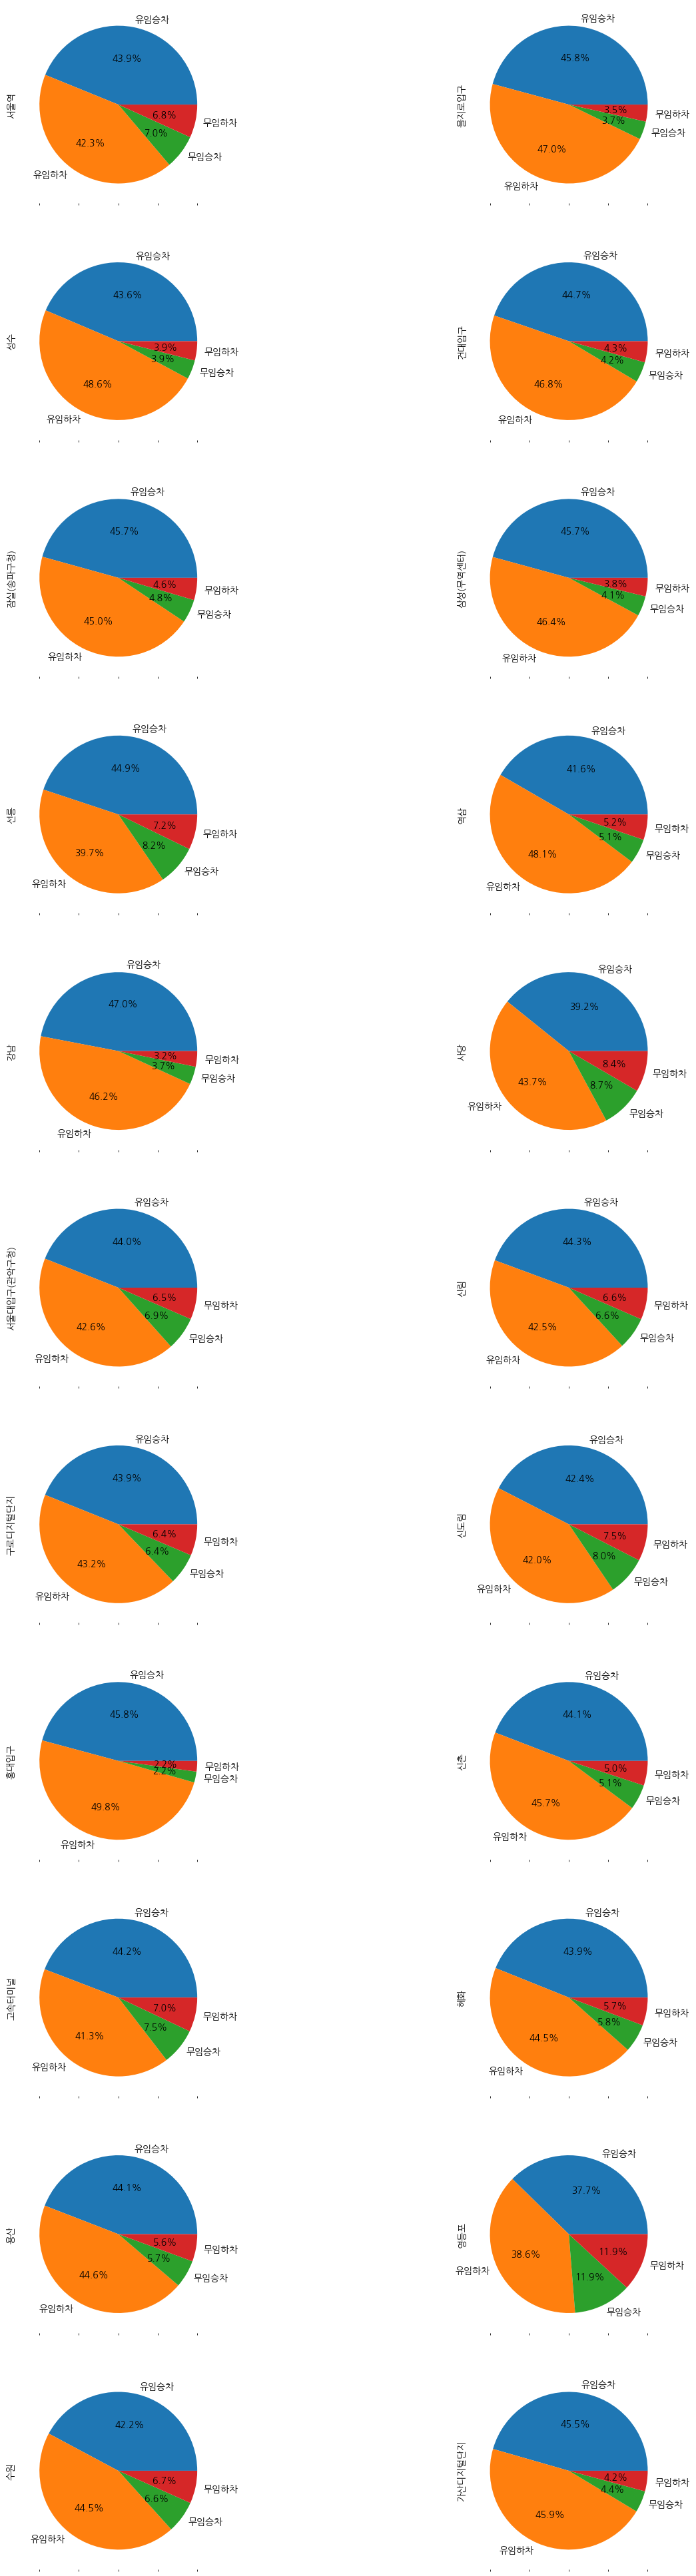

In [ ]:
# 차트

df_chart.plot.pie(subplots=True, layout=(11,2), autopct="%.1f%%", legend=False, figsize=(16,50));

## 시간대별

In [ ]:
# 호선명, 지하철역, 4:00 ~ 24:00

df_subway = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/data/2024년 05월  교통카드 통계자료.xls", sheet_name=3, usecols="B,D:AT",thousands=",", skiprows=1)
df_subway.head(3)

,Unnamed: 1,Unnamed: 3,승차,하차,승차.1,하차.1,승차.2,하차.2,승차.3,하차.3,...,승차.16,하차.16,승차.17,하차.17,승차.18,하차.18,승차.19,하차.19,승차.20,하차.20
0,1호선,서울역,712,15,8896,9542,14747,61682,43154,122280,...,91062,53023,94433,49173,62106,33456,30783,16695,3655,4788
1,1호선,시청,106,2,2365,5549,4256,27042,8011,75120,...,60184,11419,56661,9962,34372,7292,11310,4696,623,1156
2,1호선,종각,154,3,4348,5805,4534,33873,7478,114857,...,88518,14902,94549,11103,66342,7991,29575,5499,2053,1464


### 데이터 전철
- 컬럼명 변경
  - 호선명, 지하철역, 승차_4, 하차_4, 승차_5, ..., 하차_24

In [ ]:
# df_subway.columns = ['호선명','지하철역','승차_4'...]

list1 = ['호선명','지하철역']

for i in range(4,25):
  list1.append("승차_"+str(i))
  list1.append("하차_"+str(i))

# 파이썬은 문자열에 숫자를 바로 못 붙임 : 숫자 → 문자 - str
list1

['호선명',
 '지하철역',
 '승차_4',
 '하차_4',
 '승차_5',
 '하차_5',
 '승차_6',
 '하차_6',
 '승차_7',
 '하차_7',
 '승차_8',
 '하차_8',
 '승차_9',
 '하차_9',
 '승차_10',
 '하차_10',
 '승차_11',
 '하차_11',
 '승차_12',
 '하차_12',
 '승차_13',
 '하차_13',
 '승차_14',
 '하차_14',
 '승차_15',
 '하차_15',
 '승차_16',
 '하차_16',
 '승차_17',
 '하차_17',
 '승차_18',
 '하차_18',
 '승차_19',
 '하차_19',
 '승차_20',
 '하차_20',
 '승차_21',
 '하차_21',
 '승차_22',
 '하차_22',
 '승차_23',
 '하차_23',
 '승차_24',
 '하차_24']

In [ ]:
df_subway.columns = list1
df_subway.head(3)

,호선명,지하철역,승차_4,하차_4,승차_5,하차_5,승차_6,하차_6,승차_7,하차_7,...,승차_20,하차_20,승차_21,하차_21,승차_22,하차_22,승차_23,하차_23,승차_24,하차_24
0,1호선,서울역,712,15,8896,9542,14747,61682,43154,122280,...,91062,53023,94433,49173,62106,33456,30783,16695,3655,4788
1,1호선,시청,106,2,2365,5549,4256,27042,8011,75120,...,60184,11419,56661,9962,34372,7292,11310,4696,623,1156
2,1호선,종각,154,3,4348,5805,4534,33873,7478,114857,...,88518,14902,94549,11103,66342,7991,29575,5499,2053,1464


## 분석
- 출근 시간대(7~9) 사람들이 가장 많이 타는 역 찾기

In [ ]:
df_subway['출근 계'] = df_subway['승차_7'] + df_subway['승차_8'] + df_subway['승차_9']
df_subway['하차 계'] = df_subway['하차_7'] + df_subway['하차_8'] + df_subway['하차_9']

In [ ]:
df_subway[df_subway['출근 계'].max() == df_subway['출근 계']]

,호선명,지하철역,승차_4,하차_4,승차_5,하차_5,승차_6,하차_6,승차_7,하차_7,...,승차_21,하차_21,승차_22,하차_22,승차_23,하차_23,승차_24,하차_24,출근 계,하차 계
39,2호선,신림,217,5,39624,4285,72112,18451,184578,29861,...,44869,123630,37752,115187,22235,74882,4587,24826,617864,120512


In [ ]:
df_subway[df_subway['하차 계'].max() == df_subway['하차 계']]

,호선명,지하철역,승차_4,하차_4,승차_5,하차_5,승차_6,하차_6,승차_7,하차_7,...,승차_21,하차_21,승차_22,하차_22,승차_23,하차_23,승차_24,하차_24,출근 계,하차 계
30,2호선,역삼,55,1,3902,7881,9260,41795,16692,157268,...,77816,20958,53189,17724,21018,11143,3622,3564,68880,816320


- 특정 시간대 사람들이 가장 많이 타는 역 알아보기

In [ ]:
# 밤 11시에 가장 혼잡한 역은? 승차

df_subway.columns

Index(['호선명', '지하철역', '승차_4', '하차_4', '승차_5', '하차_5', '승차_6', '하차_6', '승차_7',
       '하차_7', '승차_8', '하차_8', '승차_9', '하차_9', '승차_10', '하차_10', '승차_11',
       '하차_11', '승차_12', '하차_12', '승차_13', '하차_13', '승차_14', '하차_14', '승차_15',
       '하차_15', '승차_16', '하차_16', '승차_17', '하차_17', '승차_18', '하차_18', '승차_19',
       '하차_19', '승차_20', '하차_20', '승차_21', '하차_21', '승차_22', '하차_22', '승차_23',
       '하차_23', '승차_24', '하차_24', '출근 계', '하차 계'],
      dtype='object')

In [ ]:
df_subway[df_subway['승차_23'].max() == df_subway['승차_23']]

,호선명,지하철역,승차_4,하차_4,승차_5,하차_5,승차_6,하차_6,승차_7,하차_7,...,승차_21,하차_21,승차_22,하차_22,승차_23,하차_23,승차_24,하차_24,출근 계,하차 계
48,2호선,홍대입구,1129,24,31942,3858,33706,19834,63208,43832,...,207273,96102,200274,81477,105230,59995,14242,21542,211901,311144


In [ ]:
# 2 + (승차시각-4) * 2

idx = 2 + (23-4) * 2

df_subway.iloc[:,idx]

0      30783
1      11310
2      29575
3      21757
4       6968
       ...  
615     1085
616      899
617      494
618     2264
619      830
Name: 승차_23, Length: 620, dtype: int64

In [ ]:
answer = int(input("승차 인원이 궁금한 시간을 입력해 주세요(24시간)"))

idx = 2 + (answer-4) * 2

df_subway[df_subway.iloc[:,idx].max() == df_subway.iloc[:, idx]]

승차 인원이 궁금한 시간을 입력해 주세요(24시간)4


,호선명,지하철역,승차_4,하차_4,승차_5,하차_5,승차_6,하차_6,승차_7,하차_7,...,승차_21,하차_21,승차_22,하차_22,승차_23,하차_23,승차_24,하차_24,출근 계,하차 계
128,경부선,구로,12967,65,22999,4704,19789,13663,39484,31757,...,17856,21484,12766,18755,4877,13972,36,13289,107386,140240


- 시간대별로 사람들이 가장 많이 타고 내리는 역은?

In [ ]:
# 5시에 최대 승차인원의 인덱스?

# 최대 승차인원
# df_subway['승차_5'].max()
max(df_subway['승차_5'])

# idxmax() : 컬럼에서 가장 높은 행의 인덱스 돌려줌
max_idx = df_subway['승차_5'].idxmax()
max_idx

162

In [ ]:
df_subway.iloc[max_idx]["지하철역"]

'부천'

In [ ]:
df_subway.columns

Index(['호선명', '지하철역', '승차_4', '하차_4', '승차_5', '하차_5', '승차_6', '하차_6', '승차_7',
       '하차_7', '승차_8', '하차_8', '승차_9', '하차_9', '승차_10', '하차_10', '승차_11',
       '하차_11', '승차_12', '하차_12', '승차_13', '하차_13', '승차_14', '하차_14', '승차_15',
       '하차_15', '승차_16', '하차_16', '승차_17', '하차_17', '승차_18', '하차_18', '승차_19',
       '하차_19', '승차_20', '하차_20', '승차_21', '하차_21', '승차_22', '하차_22', '승차_23',
       '하차_23', '승차_24', '하차_24', '출근 계', '하차 계'],
      dtype='object')

In [ ]:
# difference() : 특정 컬럼 제외

groups_col = df_subway.columns.difference(['호선명','지하철역','출근 계','하차 계'], sort=False)
groups_col

Index(['승차_4', '하차_4', '승차_5', '하차_5', '승차_6', '하차_6', '승차_7', '하차_7', '승차_8',
       '하차_8', '승차_9', '하차_9', '승차_10', '하차_10', '승차_11', '하차_11', '승차_12',
       '하차_12', '승차_13', '하차_13', '승차_14', '하차_14', '승차_15', '하차_15', '승차_16',
       '하차_16', '승차_17', '하차_17', '승차_18', '하차_18', '승차_19', '하차_19', '승차_20',
       '하차_20', '승차_21', '하차_21', '승차_22', '하차_22', '승차_23', '하차_23', '승차_24',
       '하차_24'],
      dtype='object')

In [ ]:
# 각 시간대 최대 승하차 인원의 인덱스 추출

idx_max = df_subway[groups_col].idxmax().to_list()

In [ ]:
# 각 시간대 최대 승하차 인원 추출

passenger_max = df_subway[groups_col].max().to_list()

In [ ]:
data = {
    "승하차" : groups_col,
    "idx_max" : idx_max,
    "승객수" : passenger_max
}

df_passenger_max_time = pd.DataFrame(data)
df_passenger_max_time.head()

,승하차,idx_max,승객수
0,승차_4,128,12967
1,하차_4,125,131
2,승차_5,162,42292
3,하차_5,31,12221
4,승차_6,39,72112


In [ ]:
# 지하철역 추가
# df_subway.iloc[idx_max, '지하철역']
# loc : label 이름으로써의 의미 / iloc : index 인덱스 번호로써의 의미 (인덱스 레이블 == 인덱스 번호와 동일해서 둘 다 사용 가능 , but, 이름이랑 번호랑 다르면 안 됨)

df_passenger_max_time['지하철역'] = df_subway.loc[idx_max,'지하철역'].to_list()
df_passenger_max_time.head()

,승하차,idx_max,승객수,지하철역
0,승차_4,128,12967,구로
1,하차_4,125,131,영등포
2,승차_5,162,42292,부천
3,하차_5,31,12221,강남
4,승차_6,39,72112,신림


## 시각화

In [ ]:
# 승하차 컬럼에서 숫자만 잘라내기

print(df_passenger_max_time['승하차'].dtype)

# expand : 잘라내서 칼럼으로 만듦
df_passenger_max_time['승하차'].str.split('_')[1]

object


['하차', '4']

In [ ]:
df_passenger_max_time['hour'] = df_passenger_max_time['승하차'].str.split('_', expand=True)[1]
df_passenger_max_time.head()

,승하차,idx_max,승객수,지하철역,hour
0,승차_4,128,12967,구로,4
1,하차_4,125,131,영등포,4
2,승차_5,162,42292,부천,5
3,하차_5,31,12221,강남,5
4,승차_6,39,72112,신림,6


In [ ]:
# 혼잡역 = 지하철역_hour

df_passenger_max_time['혼잡역'] = df_passenger_max_time['지하철역'] + '_' + df_passenger_max_time['hour']
df_passenger_max_time.head()

,승하차,idx_max,승객수,지하철역,hour,혼잡역
0,승차_4,128,12967,구로,4,구로_4
1,하차_4,125,131,영등포,4,영등포_4
2,승차_5,162,42292,부천,5,부천_5
3,하차_5,31,12221,강남,5,강남_5
4,승차_6,39,72112,신림,6,신림_6


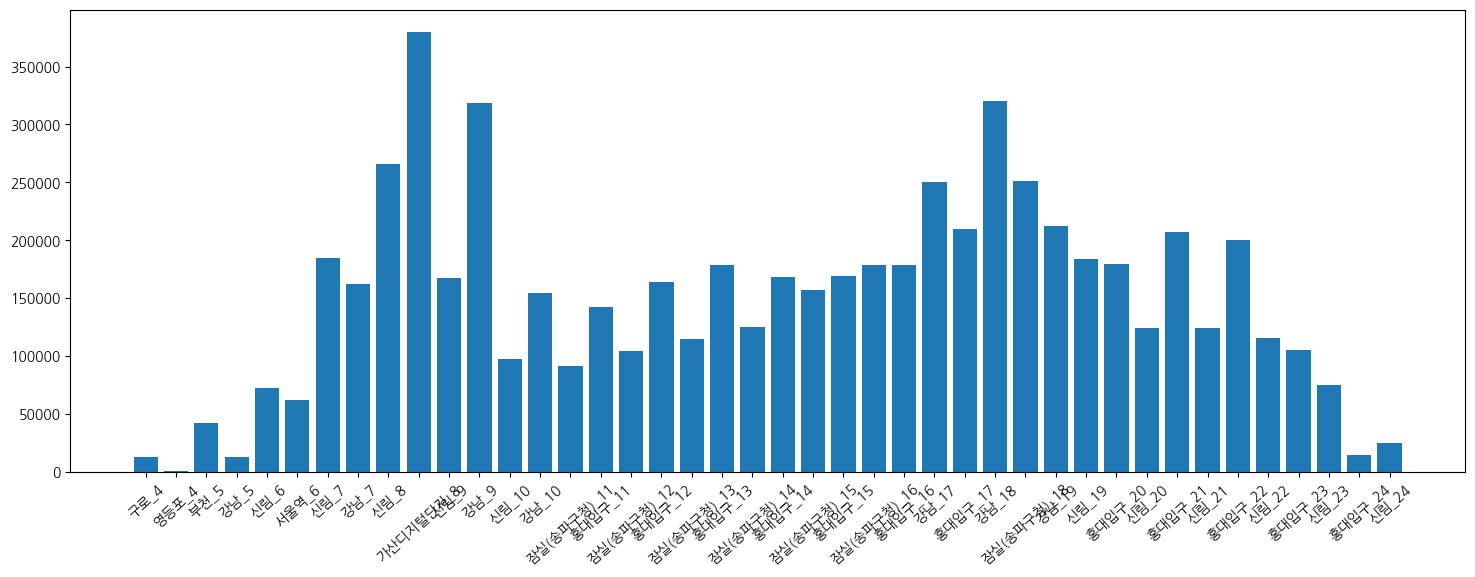

In [ ]:
# x : 혼잡역, y = 승객수
plt.figure(figsize=(18,6))
# plt.bar(x=df_passenger_max_time['혼잡역'], height=df_passenger_max_time['승객수']);
plt.bar(x='혼잡역', height='승객수', data=df_passenger_max_time);
plt.xticks(rotation=42);

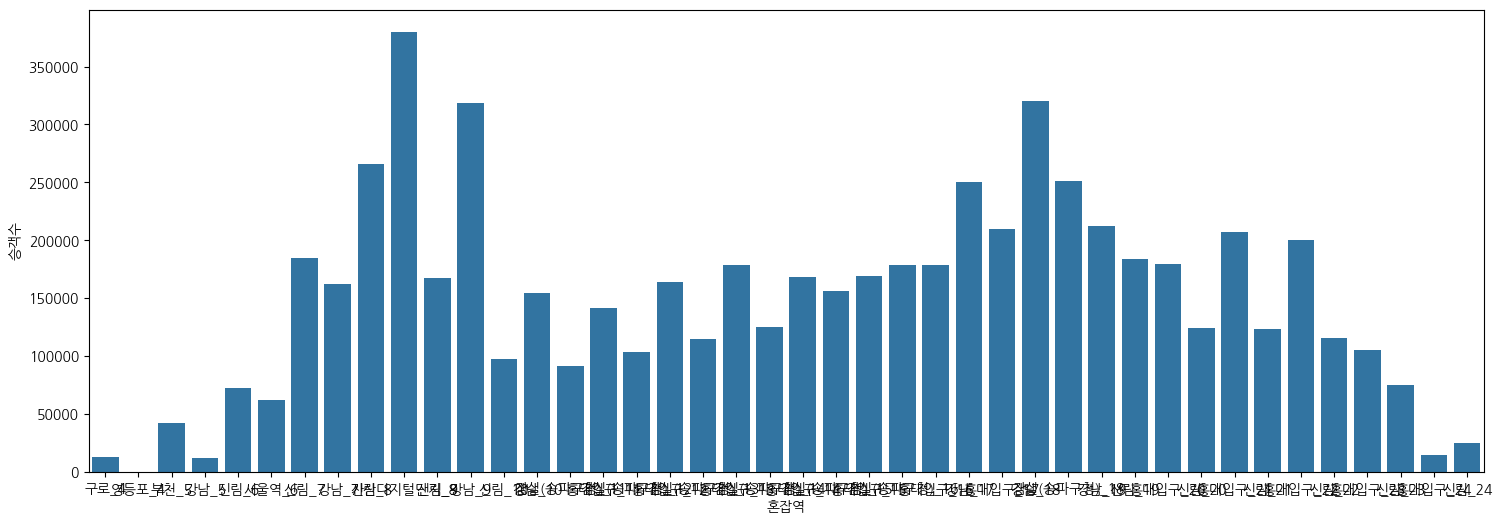

In [ ]:
plt.figure(figsize=(18,6))

sns.barplot(x='혼잡역', y='승객수', data=df_passenger_max_time);

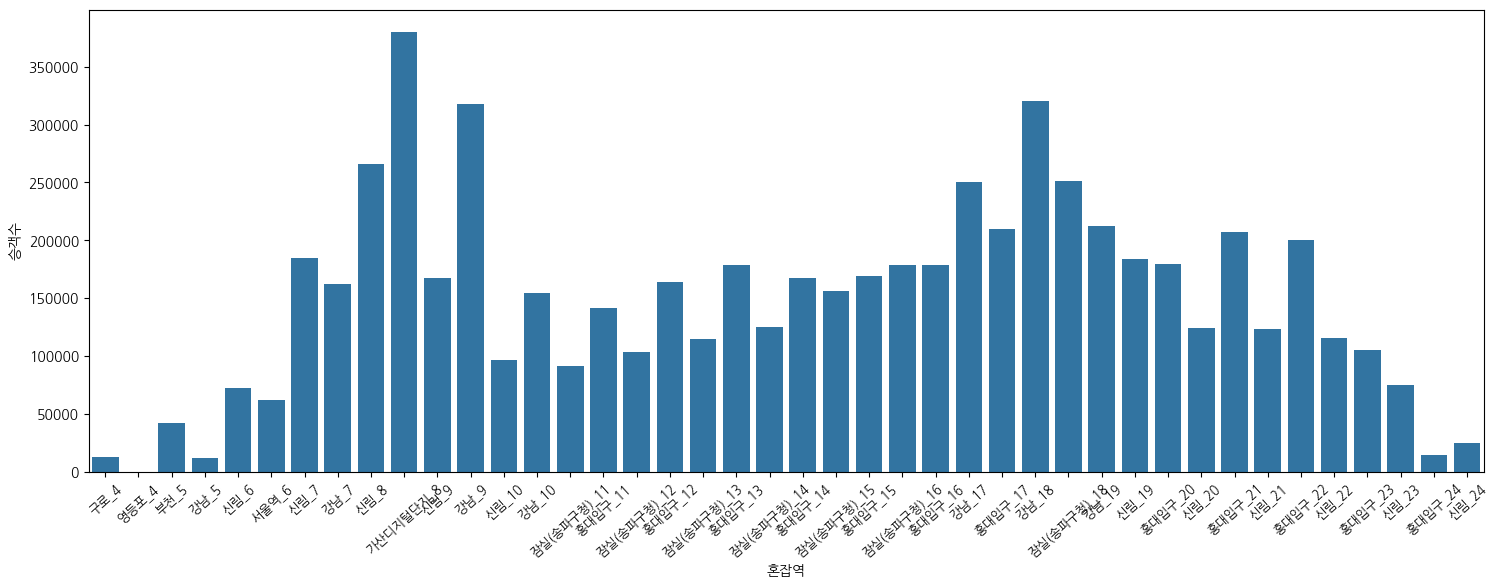

In [ ]:
plt.figure(figsize=(18,6))
ax = sns.barplot(x='혼잡역', y='승객수', data=df_passenger_max_time);
ax.set_xticklabels(df_passenger_max_time['혼잡역'],rotation=42, fontsize=9);

In [ ]:
# 승차만 보기

df_max_in = df_passenger_max_time[df_passenger_max_time['승하차'].str.contains('승차')].copy()
df_max_in.head()

# 하차만 보기
df_max_out = df_passenger_max_time[df_passenger_max_time['승하차'].str.contains('하차')].copy()
df_max_out.head()

,승하차,idx_max,승객수,지하철역,hour,혼잡역
1,하차_4,125,131,영등포,4,영등포_4
3,하차_5,31,12221,강남,5,강남_5
5,하차_6,0,61682,서울역,6,서울역_6
7,하차_7,31,161939,강남,7,강남_7
9,하차_8,520,380181,가산디지털단지,8,가산디지털단지_8


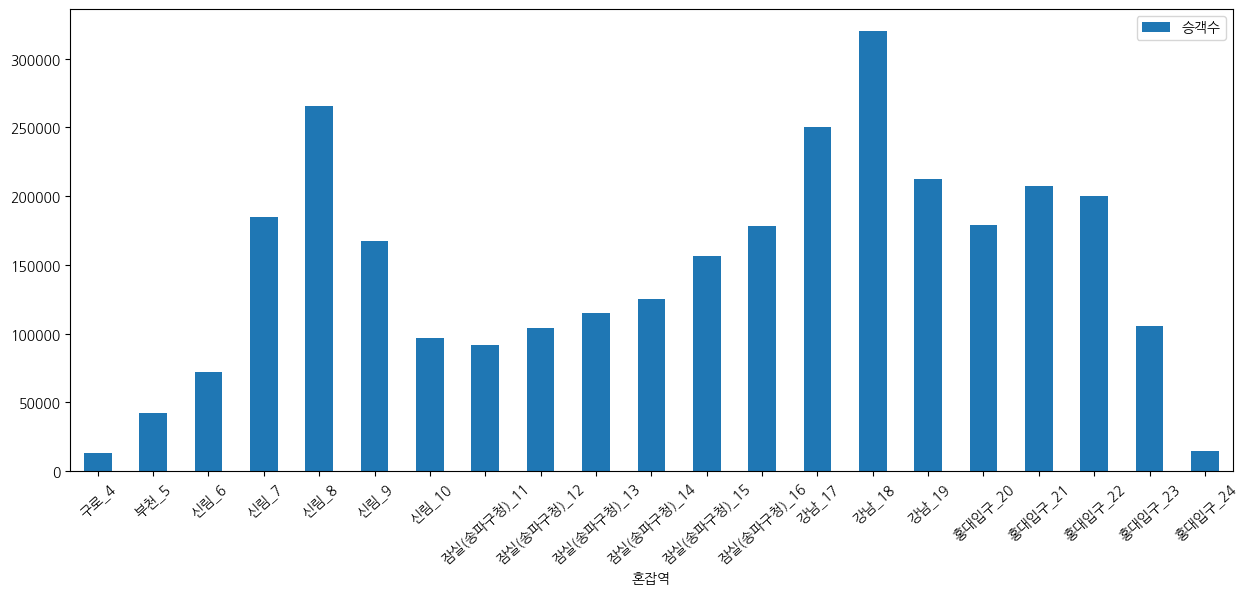

In [ ]:
df_max_in.plot.bar(x='혼잡역', y='승객수', figsize=(15,6),rot=42);

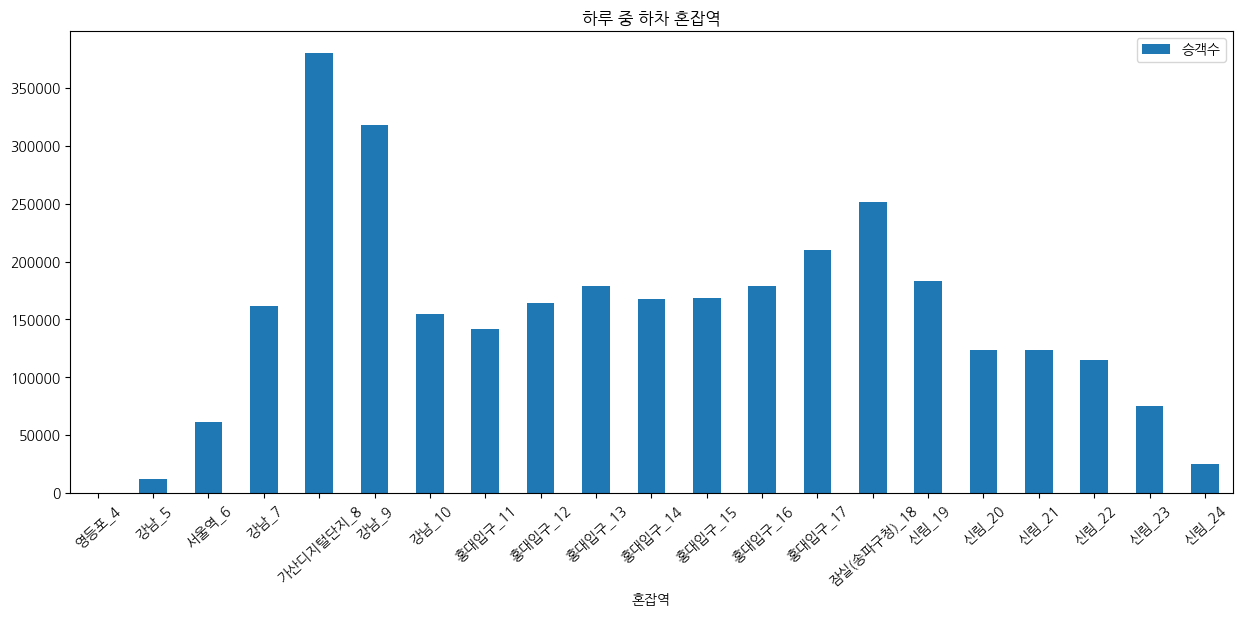

In [ ]:
df_max_out.plot.bar(x='혼잡역', y='승객수', figsize=(15,6),rot=42);
plt.title("하루 중 하차 혼잡역");

In [ ]:
df_max_in['지하철역'].value_counts()

지하철역
잠실(송파구청)    6
신림          5
홍대입구        5
강남          3
구로          1
부천          1
Name: count, dtype: int64

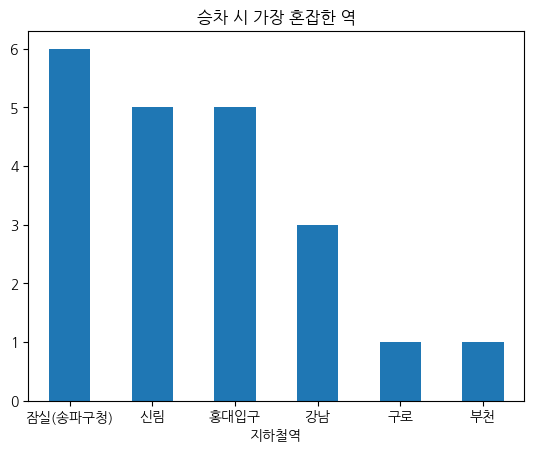

In [ ]:
plt.title("승차 시 가장 혼잡한 역")
df_max_in['지하철역'].value_counts().plot.bar(rot=0);

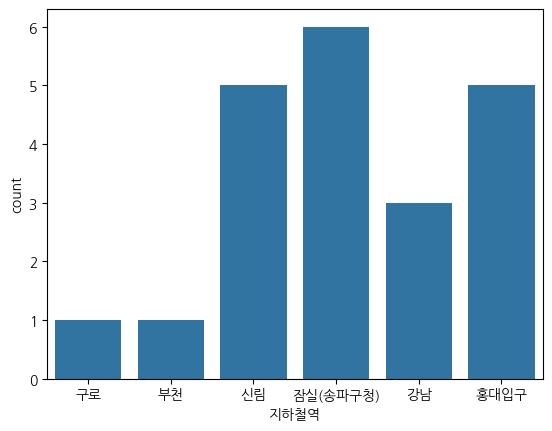

In [ ]:
# seaborn countplot() == df_max_in['지하철역'].value_counts()

sns.countplot(data=df_max_in, x='지하철역');